### 前言：基于有限差分法的一维定态薛定谔方程分析
<strong>一维定态薛定谔方程</strong>：
$$ \frac{-\hbar^2}{2m}\frac{\partial^2\psi}{\partial x^2} +V\psi=E\psi$$
<strong>有限差分法(FDM)</strong>中用于近似二阶偏导数的三点模板
对 $\psi_{i+1}$,$\psi_{i-1}$ 进行泰勒展开
，在有限差分方法中，我们常常使用泰勒展开的前几项来近似函数的导数
$$ \psi(x_{i+1})=\psi(x_i)+\psi'(x_i) (\Delta x) + \frac12\psi''(x_i)(\Delta x)^2 +O\left((\Delta x)^3\right) $$
$$ \psi(x_{i-1})=\psi(x_i)-\psi'(x_i) (\Delta x) + \frac12\psi''(x_i)(\Delta x)^2 -O\left((\Delta x)^3\right) $$
上面两式相加
$$ \psi(x_{i+1})-2\psi(x_i)+\psi(x_{i-1})=\psi''(x_i)(\Delta x)^2+O\left((\Delta x)^4\right) $$
$$ \psi''(x_i)\approx \frac{\psi(x_{i+1})-2\psi(x_i)+\psi(x_{i-1})}{(\Delta x)^2} $$
$\Delta x$越小，数据越精准
所以有:
$$ \frac{\partial^2 \psi_{i}}{\partial x^2}=\frac{\psi_{i+1}-2\psi_i+\psi_{i-1}}{(\Delta x)^2} $$ 
将上式代入薛定谔方程
$$ -\frac{\hbar^2}{2m}\frac{\psi_{i+1}-2\psi_i+\psi_{i-1}}{(\Delta x)^2}+V_i\psi_i=E\psi_i $$
为数值分析更为方便，这里我们令$\hbar=1$,并进行移项,即：
$$-\frac{1}{2(\Delta x)^2}\psi_{i-1}+\frac{1}{(\Delta x)^2}\psi_i  -\frac{1}{2(\Delta x)^2}\psi_{i+1}+mV_i\psi_i=mE\psi_i$$
写成矩阵形式，此处使用无限深方势阱的边界条件$\psi_0=0,\psi_N=0$:
$$
\begin{bmatrix}
\frac{1}{(\Delta x)^2}+mV_1 & -\frac{1}{2(\Delta x)^2} & 0 & \cdots & 0 \\
-\frac{1}{2(\Delta x)^2} & \frac{1}{(\Delta x)^2}+mV_2&-\frac{1}{2(\Delta x)^2} &\cdots & 0\\
0 &-\frac{1}{2(\Delta x)^2} & \frac{1}{(\Delta x)^2}+mV_3&\cdots &0\\
\vdots & \vdots & \vdots & \ddots&\vdots\\
0&\cdots&0 &-\frac{1}{2(\Delta x)^2} & \frac{1}{(\Delta x)^2}+mV_{N-1}\\
\end{bmatrix}
\begin{bmatrix}
\psi_1\\
\psi_2\\
\cdots\\
\psi_{N-1}\\
\end{bmatrix}
=mE
\begin{bmatrix}
\psi_1\\
\psi_2\\
\cdots\\
\psi_{N-1}\\
\end{bmatrix}
$$
可知$$\hat H=\hat T +\hat V$$
所以动能算符
$$\hat T=
-\frac{1}{2(\Delta x)^2}
\begin{bmatrix}
-2&1&0&\cdots&0\\
1&-2&1&\cdots&0\\
0&1&-2&\cdots&0\\
\vdots & \vdots & \vdots & \ddots&\vdots\\
0&\cdots&1&-2&1\\
0&\cdots&\cdots&1&-2\\
\end{bmatrix}
$$
$$ \hat V=m
\begin {bmatrix}
V_1&0&0&\cdots&0\\
0&V_2&0&\cdots&0\\
0&0&V_3&\cdots&0\\
\vdots&\vdots&\vdots&\ddots&\vdots\\
0&\cdots&\cdots&0&V_{N-1}\\
\end{bmatrix}
$$
一维拉普拉斯算符的矩阵表达为：
$$D_{xx}=D_{yy}=\frac{1}{(\Delta x)^2}
\begin{bmatrix}
-2&1&0&\cdots&0\\
1&-2&1&\cdots&0\\
0&1&-2&\cdots&0\\
\vdots & \vdots & \vdots & \ddots&\vdots\\
0&\cdots&1&-2&1\\
0&\cdots&\cdots&1&-2\\
\end{bmatrix}
$$

***
### 齐次迪利克雷
齐次狄利克雷边界条件本身并不仅仅是为了简化有限差分法（FDM）或其他数值方法的计算而设计的。实际上，它源自物理或工程问题的实际约束和需求。当问题的物理背景或工程要求在某个区域的边界上函数值为零时，就会自然地引入齐次狄利克雷边界条件。这种边界条件在理论物理、工程学、数学分析等多个领域中都有其物理意义和应用背景。

然而，在使用有限差分法或其他数值求解方法如有限元法（FEM）时，齐次狄利克雷边界条件确实简化了求解过程。这是因为在边界上函数值被设定为零，这样在离散化过程中，边界点的值直接确定了，从而减少了需要通过方程求解的未知数数量。特别是在构造线性方程组以求解离散化后的PDE时，这种边界条件直接为某些方程提供了解，使得求解过程更为直接和简洁。

在有限差分法中，如果问题设定了齐次狄利克雷边界条件，那么在对问题域进行网格划分并应用差分方程时，边界上的网格点将被直接设置为零。这简化了网格点上的计算，因为这些点不需要通过差分方程来求解，从而降低了计算复杂性和计算量。但是，重要的是要认识到，这种简化是问题本身物理或工程背景决定的，而不是数值方法强加的。

总的来说，齐次狄利克雷边界条件既是从物理和工程问题的实际应用出发的自然选择，也恰好为数值求解方法（如有限差分法）提供了计算上的简化。
***

<strong>在无限深势阱的边界条件下</strong>,一维拉普拉斯算符的矩阵表达为：
$$D_{xx}=\frac{1}{(\Delta x)^2}
\begin{bmatrix}
-2&1&0&\cdots&0\\
1&-2&1&\cdots&0\\
0&1&-2&\cdots&0\\
\vdots & \vdots & \vdots & \ddots&\vdots\\
0&\cdots&1&-2&1\\
0&\cdots&\cdots&1&-2\\
\end{bmatrix}
$$
令$\hbar=1$,二维下的哈密顿算符可表示为：
$$\hat H = -\frac{1}{2m}\left(\frac{\partial^2}{\partial x^2}+\frac{\partial^2}{\partial y^2}\right)+\hat V(x,y)$$
使用<strong>克罗内克和</strong>离散化拉普拉斯算子,即：
$$\frac{\partial^2}{\partial x^2}+\frac{\partial^2}{\partial y^2}=D_{xx}\oplus D_{yy}$$
其中克罗内克和的形式为：
$$D_{xx}\oplus D_{yy}=D_{xx}\otimes I + I \otimes D_{yy}$$
$$D_{xx}=D_{yy}$$

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
from mpl_toolkits.mplot3d import Axes3D
import scienceplots
from scipy.sparse.linalg import eigsh   #Scipy稀疏线性代数库
from scipy.sparse.linalg import eigs    #Scipy稀疏线性代数库
plt.style.use(['science', 'notebook'])
from scipy import sparse
from skimage import measure
import torch
import plotly.graph_objects as go
from torch import lobpcg
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
#创建网格
N=400
X,Y=np.meshgrid(np.linspace(-1,1,N,dtype=float),np.linspace(-1,1,N,dtype=float))

则<strong>二维定态薛定谔方程</strong>可化为如下形式：
$$\left [-\frac{1}{2m}(D_{xx}\oplus D_{yy})+V\right]\psi=E\psi$$
再令D的形式为：
$$D=\begin{bmatrix}
-2&1&0&\cdots&0\\
1&-2&1&\cdots&0\\
0&1&-2&\cdots&0\\
\vdots & \vdots & \vdots & \ddots&\vdots\\
0&\cdots&1&-2&1\\
0&\cdots&\cdots&1&-2\\
\end{bmatrix}
$$ 
则可进一步化为：
$$\left [-\frac{1}{2}(D\oplus D)+m(\Delta x)^2V\right]\psi=m(\Delta x)^2E\psi$$
***

则<strong>三维定态薛定谔方程</strong>形式可表示为：
$$\left[-\frac{1}{2}(D \oplus D \oplus D) + m\Delta x^2 V \right] \psi = \left(m \Delta x^2 E\right) \psi$$
其中，令动能项为： $$\hat T=-\frac{1}{2}(D\oplus D \oplus D)$$
令势能项为：$$\hat U=m(\Delta x)^2V$$

可知氢原子势能($\hbar=1$)为：
$$V(r) = -\frac{e^2}{4 \pi \epsilon_0 r} = -\frac{1}{m a_0 r}$$
其中
$$a_0=\frac{4\pi\varepsilon_0\hbar^2}{me^2}$$

In [3]:
#定义势能
def get_potential(x,y):
    return 0*x
V=get_potential(X,Y)

In [4]:
#定义动能
diag=np.ones([N])
diags=np.array([diag,-2*diag,diag])
D=sparse.spdiags(diags,[-1,0,1],N,N)    #创建一个三对角矩阵,N*N的稀疏矩阵
T=-1/2*sparse.kronsum(D,D)
U=sparse.diags(V.reshape(N**2),0)
H=T+U
H

<160000x160000 sparse matrix of type '<class 'numpy.float64'>'
	with 798400 stored elements in Compressed Sparse Row format>

In [9]:
#将scipy稀疏矩阵转换为torch稀疏张量,并将其转移到GPU上计算
H=H.tocoo()
H=torch.sparse_coo_tensor(indices=torch.tensor([H.row,H.col]),values=torch.tensor(H.data),size=H.shape).to(device)

C:\Users\xsxwz\AppData\Local\Temp\ipykernel_14976\1635873289.py:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:278.)
  H=torch.sparse_coo_tensor(indices=torch.tensor([H.row,H.col]),values=torch.tensor(H.data),size=H.shape).to(device)


In [10]:
eigenvalues,eigenvectors=lobpcg(H,k=10,largest=False)   #求解矩阵的特征值和特征向量,返回前k个最小的特征值和对应的特征向量

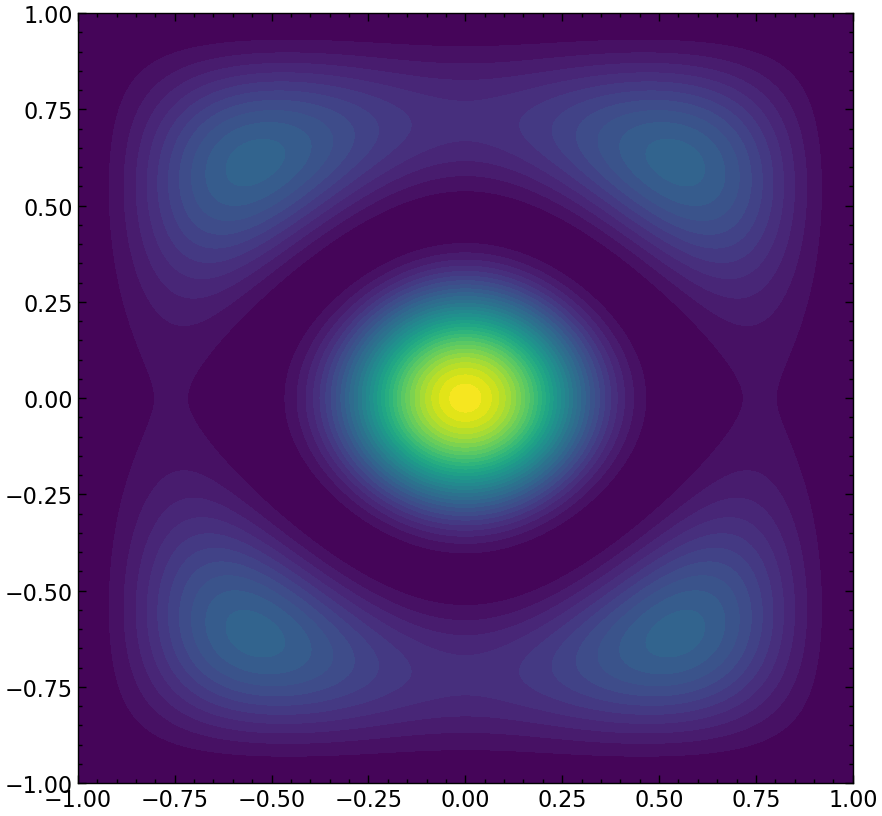

In [14]:
def get_e(n):
    return eigenvectors.T[n].reshape(N,N).cpu()   #返回第n个特征向量,reshape成N*N的矩阵

plt.figure(figsize=(10,10))
plt.contourf(X,Y,get_e(4)**2,40)

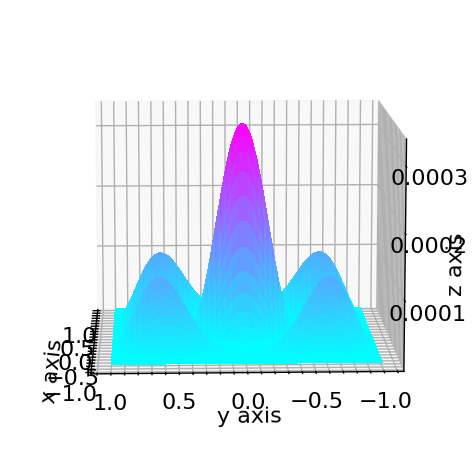

In [ ]:
my_cmap = plt.get_cmap('cool')

def init():
    surf = ax.plot_surface(X, Y, Z, cmap=my_cmap, linewidth=0, antialiased=False)
    ax.set_xlabel('x axis')
    ax.set_ylabel('y axis')
    ax.set_zlabel('z axis')
    return (surf,)  # Return a tuple containing the artists

def animate(i):
    # Your code to update the state of the figure for new frame `i`
    # Rotate the view.
    ax.view_init(elev=10, azim=2*i)
    return fig

# Set up the figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create initial plot
Z=get_e(4)**2
init()  # Initialize the figure with your init function

# Create the animation
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=90, interval=50)

# Save the animation
ani.save('rotate_azimuth_angle_3d_surf.gif', writer='pillow', fps=20)


***

令$\hbar=1$,二维下的哈密顿算符可表示为：
$$\hat H = -\frac{1}{2m}\left(\frac{\partial^2}{\partial x^2}+\frac{\partial^2}{\partial y^2}+\frac{\partial^2}{\partial z^2}\right)+\hat V(x,y,z)$$